In [1]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
-5.3e4, # Field (V.cm^-1)
1e13, # Base electron jump rate
-27, # Fermi level (J)
2.74, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
1 / (4.64e-6)
);

T = 300;

In [2]:
function f(x)
    R = Conduction.RnnVRH(semiconductor, x, T);
    return Conduction.t(semiconductor, R, x, T)
end

range = -15:0.5:15;
res = f.(range)

61-element Array{Float64,1}:
 3.724229955615316e-5
 2.258860914961418e-5
 1.3700675982806265e-5
 8.309884044201123e-6
 5.040202633166532e-6
 3.0570333962894622e-6
 1.8541824352704262e-6
 1.1246220815079982e-6
 6.821169430951263e-7
 4.1372526942878547e-7
 2.509376519067933e-7
 1.5220220206622722e-7
 9.231629174570076e-8
 ⋮
 2.056437833960085e-12
 2.0473658785147963e-12
 2.0415805935946532e-12
 2.03799819166858e-12
 2.0358474423959635e-12
 2.034595317645684e-12
 2.0338889111921936e-12
 2.0335022666537907e-12
 2.0332994426008285e-12
 2.0331948903667557e-12
 2.0331425861104467e-12
 2.033117991706481e-12

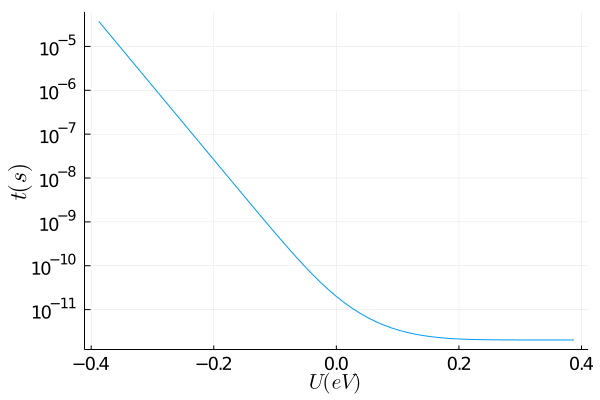

In [6]:
plot(range  .* ((Conduction.k * T) / (1.602e-19)), res, yaxis=:log, xlabel=L"U(eV)", ylabel=L"t(s)", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)


In [8]:
res = (x -> Conduction.It1(x, T, semiconductor, Conduction.RnnVRH(semiconductor, x, T))).(range)

61-element Array{Float64,1}:
 5.882950243583737e39
 3.5681938633664755e39
 2.1642169816657146e39
 1.3126644030063591e39
 7.961712579488923e38
 4.8290206750560894e38
 2.9289424241407964e38
 1.77649659682949e38
 1.0774989934574101e38
 6.53536174991163e37
 3.963890310844476e37
 2.4042104721082913e37
 1.4582124511635336e37
 ⋮
 3.534106237728914e30
 2.285153486987048e30
 1.4351533434356835e30
 8.744821744129399e29
 5.165735996241643e29
 2.9566486435770465e29
 1.6390378878839814e29
 8.7981386688569e28
 4.572295825724159e28
 2.3002300428606016e28
 1.1201332238066278e28
 5.27968301437262e27

In [ ]:
plot(range  .* ((Conduction.k * T) / (1.602e-19)), res, yaxis=:log, xlabel=L"U(eV)", ylabel=L"t(s)", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)